In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [2]:
train_data_V = pd.DataFrame()

train_data_V['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/hysteresis_all_scaled_train.csv')['total']
train_data_V['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_train.csv')['id']
train_data_V['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_train.csv')['iq']
train_data_V['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/joule_all_scaled_train.csv')['total']
train_data_V['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/speed_all_scaled_train.csv')['N']
train_data_V['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d1']
train_data_V['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d2']
train_data_V['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d3']
train_data_V['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['r1']
train_data_V['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['t1']


In [3]:
test_data_V = pd.DataFrame()

test_data_V['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/hysteresis_all_scaled_test.csv')['total']
test_data_V['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_test.csv')['id']
test_data_V['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_test.csv')['iq']
test_data_V['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/joule_all_scaled_test.csv')['total']
test_data_V['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/speed_all_scaled_test.csv')['N']
test_data_V['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d1']
test_data_V['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d2']
test_data_V['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d3']
test_data_V['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['r1']
test_data_V['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['t1']


In [4]:
def combinedHist (name, y_test, prediction, binss = 100):
    fig = plt.figure(figsize = (6, 6))
    grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.4)

    main_ax = fig.add_subplot(grid[:-1, 1:])

    y_hist = fig.add_subplot(grid[:-1, 0],
                            xticklabels = [],
                            sharey = main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:],
                            yticklabels = [],
                            sharex = main_ax)

    main_ax.hist2d(y_test, prediction,
                bins = binss, cmap = 'Blues')

    x_hist.hist(y_test, histtype = 'stepfilled', bins = binss,
                orientation = 'vertical', color = 'green', alpha = 0.3)
    x_hist.invert_yaxis()

    y_hist.hist(prediction, histtype = 'stepfilled', bins = binss,
                orientation = 'horizontal', color = 'green', alpha = 0.3)
    y_hist.invert_xaxis()

    fig.suptitle("{} - Test and Prediction Comparison".format(name), size = 18)

In [5]:
def hist2d (name, y_test, prediction, binss = 100):
    plt.hist2d(y_test, prediction, bins = binss)

    plt.title('{} - y_test and prediction'.format(name))

    plt.colorbar()

    plt.xlabel('y_test')
    plt.ylabel('prediction')

In [6]:
variable = 'hysteresis'

columns = ['hysteresis', 'joule']

X_train = train_data_V.drop(columns = columns)
y_train = train_data_V[variable]
X_test = test_data_V.drop(columns = columns)
y_test = test_data_V[variable]

In [7]:
model_V = LinearRegression()
model_V.fit(X_train, y_train)

predictions = model_V.predict(X_test)
print(f"Score: {r2_score(y_test, predictions)}")
print(f"Mean squared error: {mean_squared_error(y_test, predictions)}")
print(f"Model slope: {model_V.coef_}")
print(f"Model interception: {model_V.intercept_}")

Score: 0.8985861871927244
Mean squared error: 0.10301941763094735
Model slope: [-0.14253123  0.4444821   0.83621482  0.3180284  -0.00420289 -0.19691088
  0.06990669  0.06694606]
Model interception: -0.0005882352313952848


Text(0.5, 1.0, 'hysteresis: Test and Model Prediction')

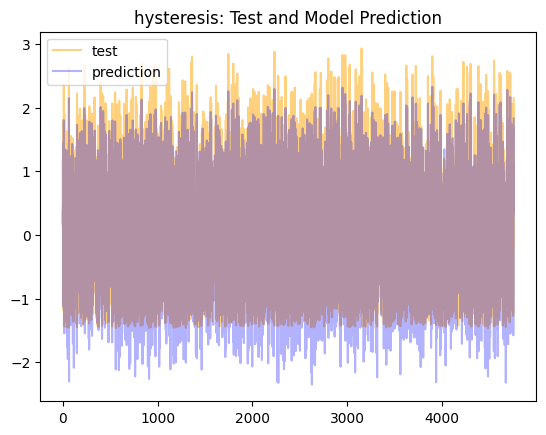

In [8]:
plt.plot(y_test, alpha = 0.5, color = 'orange', label = 'test')
plt.plot(predictions, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")

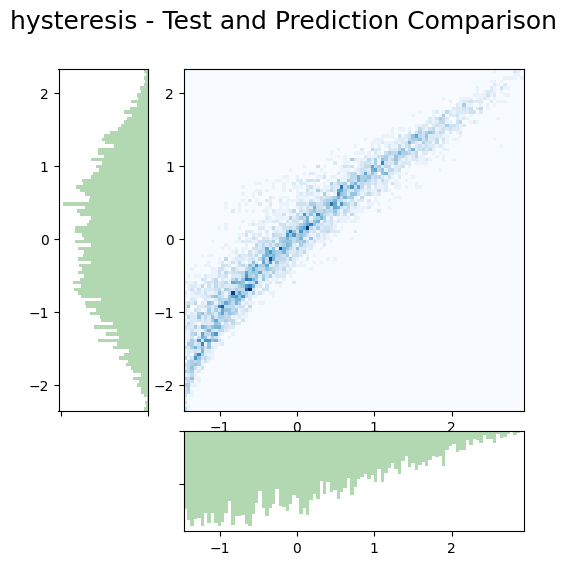

In [9]:
combinedHist(variable, y_test, predictions)

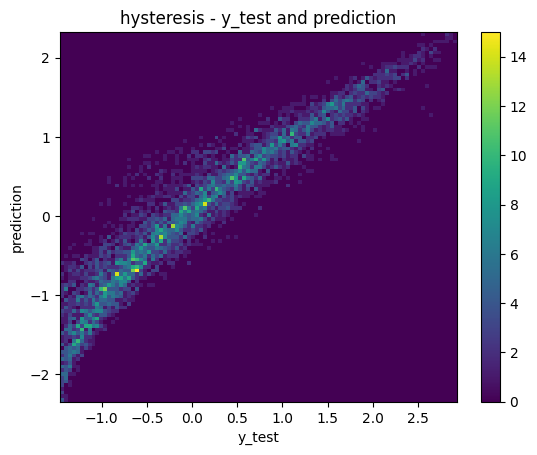

In [10]:
hist2d(variable, y_test, predictions)

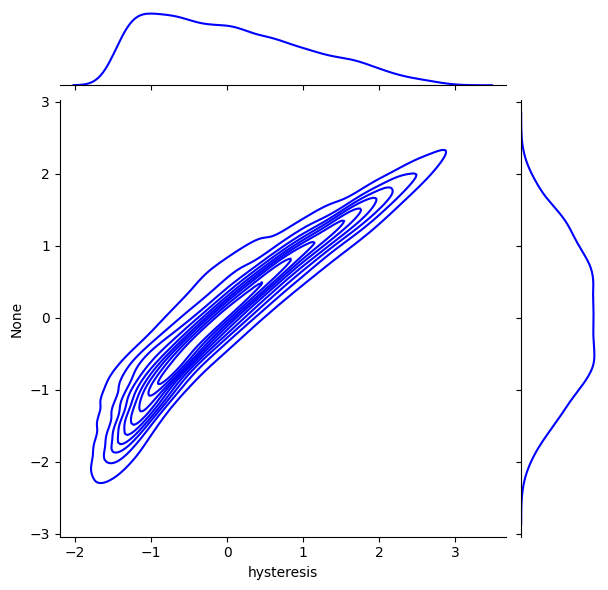

In [11]:
sns.jointplot(x = y_test, y = predictions, kind = 'kde', color = 'blue')

In [12]:
pd.DataFrame({'test': y_test, 'prediction': predictions})

test  prediction
0     0.425989    0.355712
1     0.102375    0.158669
2     1.204758    1.175575
3     0.529096    0.794540
4    -1.178508   -1.125879
...        ...         ...
4751 -1.271766   -1.578197
4752 -0.107404   -0.450905
4753  1.242872    1.106975
4754 -0.199905    0.334116
4755  2.149694    1.825027

[4756 rows x 2 columns]

In [13]:
np.size(test_data_V['speed']) == np.size(test_data_V['joule'])

True

In [14]:
method = 'linear'

newindex = pd.Index([method], name = 'method')
newcolumns = pd.Index(['score', 'mse', 'mape'], name = 'metric')
results = pd.DataFrame(index = newindex,
                       columns = newcolumns)
results.score.linear = r2_score(y_test, predictions)
results.mse.linear = mean_squared_error(y_test, predictions)
results.mape.linear = mean_absolute_percentage_error(y_test, predictions)

results.to_csv("/mnt/c/prog/IniciacaoCientifica/results/V/hysteresis/results_lin_reg.csv")

In [15]:
read = pd.DataFrame(index = newindex, 
                    columns = newcolumns)

read.loc[method] = pd.read_csv("/mnt/c/prog/IniciacaoCientifica/results/V/hysteresis/results_lin_reg.csv").iloc[0]

In [16]:
read

metric     score       mse      mape
method                              
linear  0.898586  0.103019  1.468986